In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Часть первая

### Реализовать ```adaptrls```

In [2]:
def adaptrls(x : np.ndarray, d : np.ndarray, p : int = 16, Lambda : float = 1, alpha : float = 1e4):
    N = len(x) - p
    w = np.zeros(p)
    y = np.zeros(N)
    e = np.zeros(N)
    R_inv = alpha * np.eye(p)
    for k in range(N):
        xx = np.array([x[k + p - 1 - i] for i in range(p)])
        y[k] = np.dot(xx.T, w)
        e[k] = d[k + p - 1] - y[k]
        K = (np.dot(R_inv, xx)) / (Lambda + np.dot(np.dot(xx.T, R_inv), xx))
        R_inv = (R_inv - np.dot(np.outer(K, xx.T), R_inv)) / Lambda
        w = w + K * e[k]
    return w, e

### Сгенерировать вектор характеристик, случ. вектор x, получить выходной вектор

In [27]:
p = 10
N = 400
h = np.random.normal(1, 2, p)
x = np.random.normal(0, 0.5, N)
x = np.hstack((np.zeros(p - 1), x))
sigma = 1e-1
d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))

In [28]:
w, e = adaptrls(x, d, p)

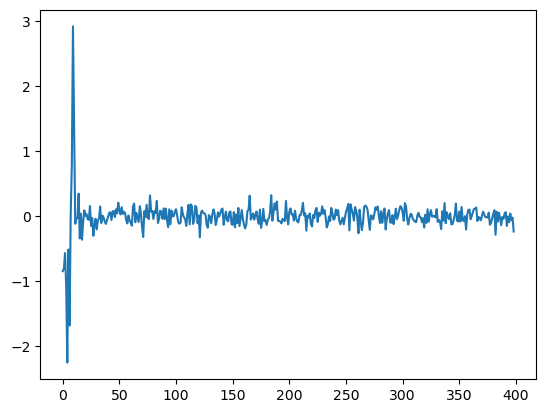

In [29]:
plt.plot(e)

### Сходимость при разных p

Text(0, 0.5, 'error')

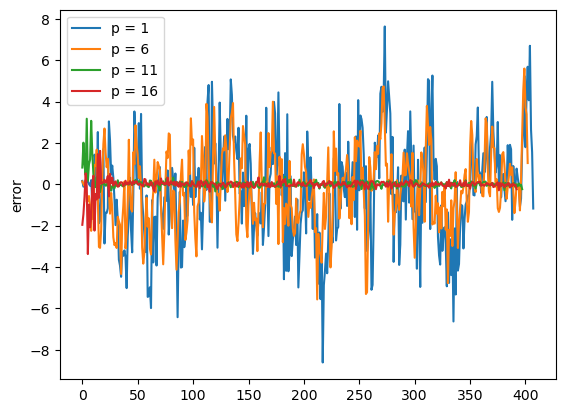

In [30]:
pRange = np.arange(1, 20, 5)
for p in pRange:
    w, e = adaptrls(x, d, p)
    plt.plot(e, label = f'p = {p}')
plt.legend()
plt.ylabel('error')

### Сходимость при разных $\sigma$

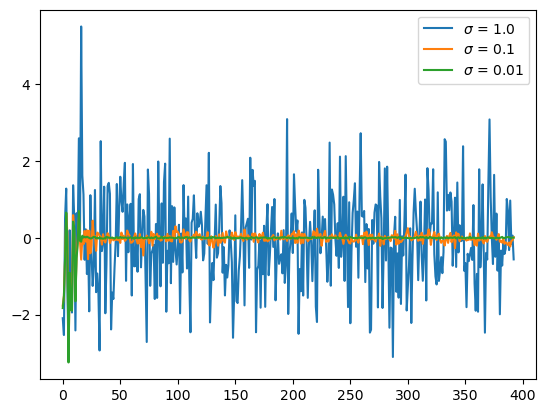

In [35]:
sigmaRange = np.logspace(-2, 0, 3)
sigmaRange = np.flip(sigmaRange)
for sigma in sigmaRange:
    d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))
    w, e = adaptrls(x, d)
    plt.plot(e, label = f'$\sigma$ = {sigma}')
plt.legend()

### Сходимость при разных $\lambda$

In [36]:
sigma = 1e-1
d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))

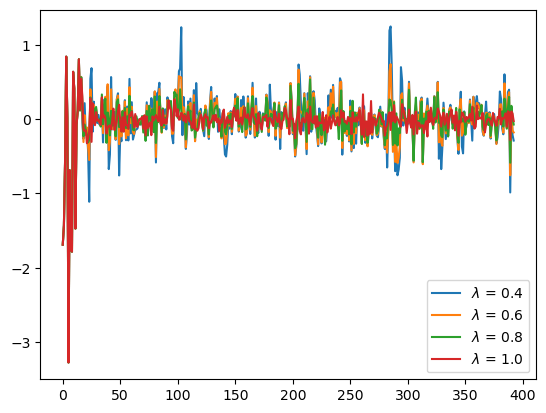

In [43]:
lambdaRange = np.linspace(0.4, 1, 4)
for Lambda in lambdaRange:
    w, e = adaptrls(x, d, 16, Lambda)
    plt.plot(e, label = f'$\lambda$ = {Lambda}')
plt.legend()

### Сгенерировать два разных вектора $h_1$ и $h_2$

In [90]:
h1 = np.random.normal(1, 2, p // 2)
h2 = np.random.normal(1, 2, p // 2)

d1 = signal.lfilter(h1, 1, x[:N//2])
d2 = signal.lfilter(h2, 1, x[N//2:])

d = np.hstack((d1, d2))

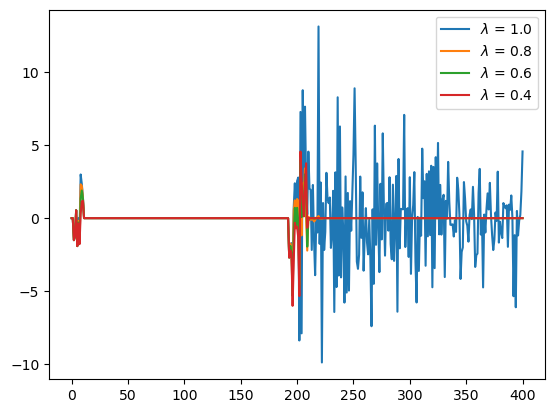

In [91]:
lambdaRange = np.linspace(0.4, 1, 4)
lambdaRange = np.flip(lambdaRange)
for Lambda in lambdaRange:
    w, e = adaptrls(x, d, 8, Lambda)
    plt.plot(e, label = f'$\lambda$ = {Lambda}')
plt.legend()